<a href="https://colab.research.google.com/github/alexjercan/mesh-pose-reconstruction/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/alexjercan/mesh-pose-reconstruction.git
%cd mesh-pose-reconstruction

import torch
from IPython.display import clear_output

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [2]:
# Download bdataset_tiny
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/bdataset_tiny.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [2]:
import config
from util.common import L_RGB, L_DEPTH, L_NORMAL

config.DATASET = 'bdataset_tiny'
config.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
config.NUM_WORKERS = 4
config.BATCH_SIZE = 8
config.IMAGE_SIZE = 224
config.MAP_SIZE = 32
config.NUM_CLASSES = 30
config.ENCODER_LEARNING_RATE = 1e-3
config.DECODER_LEARNING_RATE = 1e-3
config.ENCODER_LR_MILESTONES = [150]
config.DECODER_LR_MILESTONES = [150]
config.BETAS = (.9, .999)
config.GAMMA = .5
config.WEIGHT_DECAY = 1e-4
config.NUM_EPOCHS = 3
config.VOXEL_THRESH = .5
config.MAP_IOU_THRESH = 0.5
config.NMS_IOU_THRESH = 0.45
config.PIN_MEMORY = True
config.LOAD_MODEL = False
config.SAVE_MODEL = True
config.AUGMENT = False
config.TEST = True
config.PLOT = False
config.OUT_PATH = "./"
config.CHECKPOINT_FILE = "tiny.pth"
config.IMG_DIR = "../" + config.DATASET + "/images/"
config.MESH_DIR = "../" + config.DATASET + "/labels/"
config.DETECT_PATH = "./data/images"
config.USED_LAYERS = [L_RGB, L_DEPTH, L_NORMAL]


In [3]:
from train import train
train()

100%|██████████| 17/17 [00:08<00:00,  1.99it/s, loss=3.25, mean_iou=0.00183]


In [8]:
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/tiny.pth', 'tiny.pth')

In [4]:
import config

config.LOAD_MODEL = True
config.CHECKPOINT_FILE = "tiny.pth"

In [5]:
from test import test
test()

100%|██████████| 17/17 [00:08<00:00,  1.98it/s, loss=0.0263, mean_iou=0.0666]


In [17]:
config.DETECT_PATH = "./data/images"

image 1/1 data/images/000000rgb.png: 

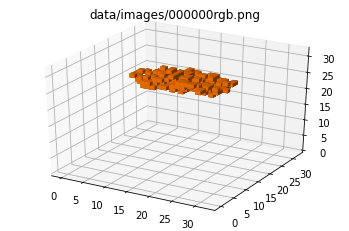

In [18]:
from detect import detect
detect(config.DETECT_PATH)